# Data Cleaning

In [74]:
import pandas as pd
filelocation_xls = 'Data/default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(filelocation_xls)

In [75]:
df.shape

(30000, 25)

In [76]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [77]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [78]:
df['ID'].nunique()

29687

In [79]:
id_counts = df['ID'].value_counts()
id_counts

f56a0841-4328    2
bf23c70b-bf12    2
c3ddce11-35e2    2
4ae0efd7-2651    2
b6ca3733-7459    2
                ..
ca8c37b1-5d36    1
035a4f3c-da98    1
42f258a3-5614    1
efcc572f-4837    1
508b2ed2-60fb    1
Name: ID, Length: 29687, dtype: int64

In [80]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [81]:
import numpy as np

In [82]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1, high=5, size=100)

In [83]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [84]:
is_equal_to_3 = random_integers == 3

In [85]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [86]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

f56a0841-4328    True
bf23c70b-bf12    True
c3ddce11-35e2    True
4ae0efd7-2651    True
b6ca3733-7459    True
Name: ID, dtype: bool

In [87]:
id_counts.index

Index(['f56a0841-4328', 'bf23c70b-bf12', 'c3ddce11-35e2', '4ae0efd7-2651',
       'b6ca3733-7459', 'dbf9fb14-2656', '9878723a-0b58', '6d1fc219-67b0',
       '527c11ea-113e', 'f0723a52-7018',
       ...
       'cf152dc8-bad0', 'b9e6c1e5-9d38', 'efc251bf-3dd0', 'c37d842c-ea9a',
       '9bb9aee0-f8a5', 'ca8c37b1-5d36', '035a4f3c-da98', '42f258a3-5614',
       'efcc572f-4837', '508b2ed2-60fb'],
      dtype='object', length=29687)

In [88]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['f56a0841-4328', 'bf23c70b-bf12', 'c3ddce11-35e2', '4ae0efd7-2651',
       'b6ca3733-7459', 'dbf9fb14-2656', '9878723a-0b58', '6d1fc219-67b0',
       '527c11ea-113e', 'f0723a52-7018',
       ...
       '68ff6fcd-1d49', '297edb0f-3bb1', '3cd5c728-df14', '8d1b6de3-9795',
       '71b5009c-75c8', '1fb3e3e6-a68d', '4dc45e9a-27bd', '8a6bbf3d-8a2d',
       'b1c90397-5fb2', '424e8a3c-0377'],
      dtype='object', length=313)

In [89]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [90]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
11616,bf23c70b-bf12,30000,2,3,2,52,3,2,2,2,...,28325,28840,5450,900,3974,0,600,0,0,1
11716,bf23c70b-bf12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16001,f56a0841-4328,130000,2,2,2,29,0,0,2,0,...,60045,47696,43677,19000,0,10000,10000,10000,10000,0
16101,f56a0841-4328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18350,c3ddce11-35e2,20000,2,2,2,22,0,-1,2,-1,...,2780,0,0,4000,0,2780,0,0,0,1
18450,c3ddce11-35e2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_zeros_mask = df == 0

In [92]:
feature_zero_mask = df_zeros_mask.iloc[:,1:].all(axis=1)

In [93]:
sum(feature_zero_mask)

315

In [94]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

In [95]:
df_clean_1.shape

(29685, 25)

In [96]:
df_clean_1['ID'].nunique()

29685

In [97]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [98]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [99]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [100]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [101]:
sum(valid_pay_1_mask)

26664

In [102]:
df_clean_1.shape

(29685, 25)

In [103]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

In [104]:
df_clean_2.shape

(26664, 25)

In [105]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [106]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [107]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [108]:
df_clean_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [109]:
import matplotlib.pyplot as plt #import olotting functionality

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 300 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fbb4862b0>,
      dtype=object)

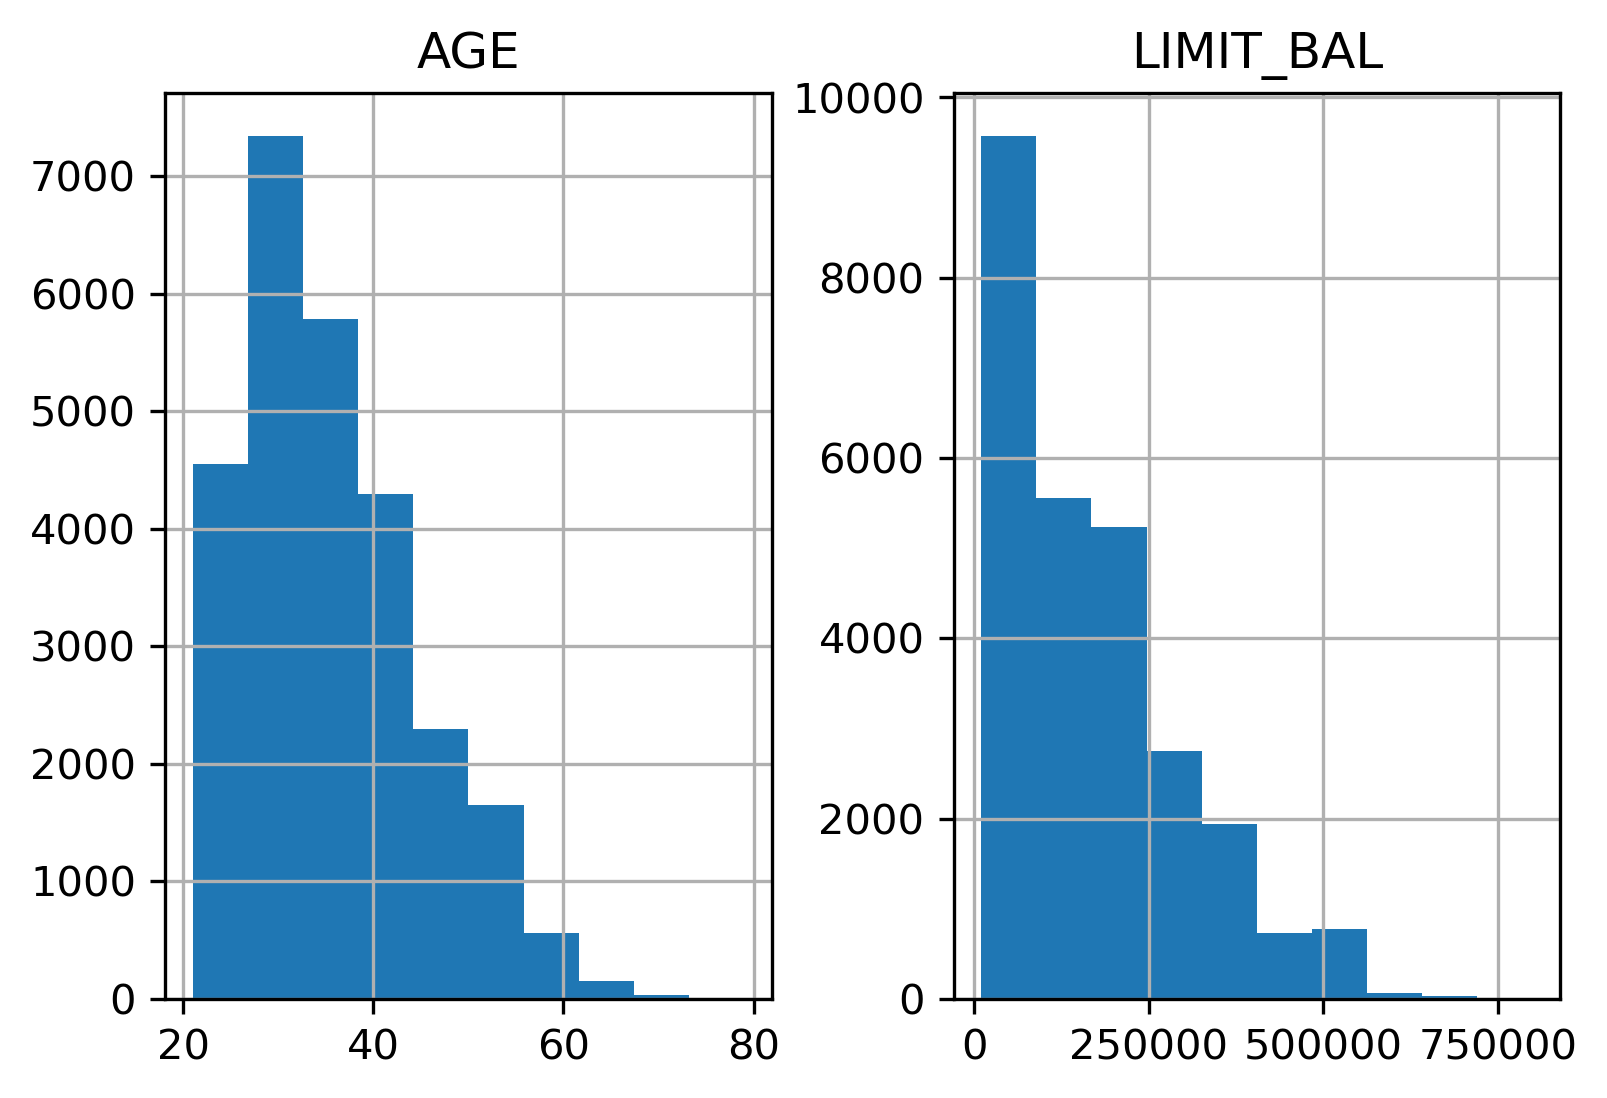

In [110]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [112]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [113]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [114]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)

In [115]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [116]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [117]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [118]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64